In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = './data/housing.csv'

In [3]:
df_data = pd.read_csv(DATA_PATH)
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
from splitter import split_data

df_train, df_test = split_data(df_data)

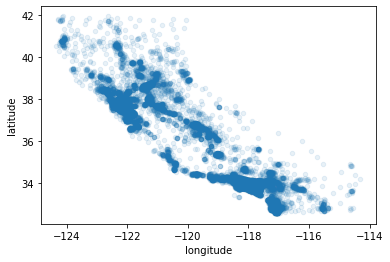

In [5]:
df_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

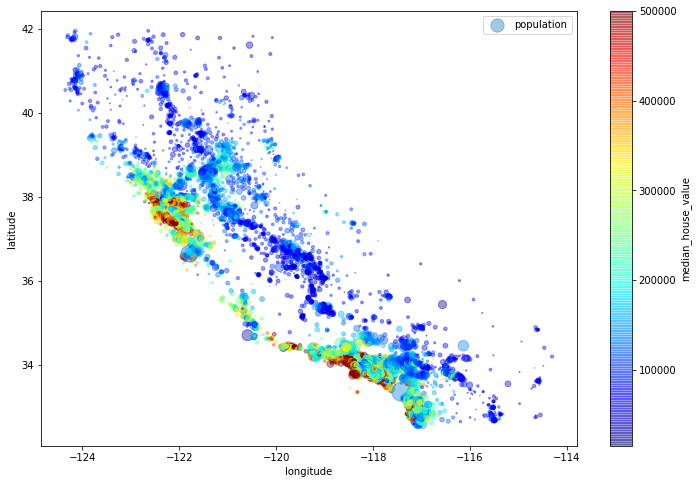

In [6]:
df_data.plot(
    kind='scatter', x='longitude', y='latitude', alpha=0.4, 
    s=df_data['population']/100, label='population', 
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False, figsize=(12, 8))
plt.legend()
plt.show()

In [7]:
corr_matrix = df_data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

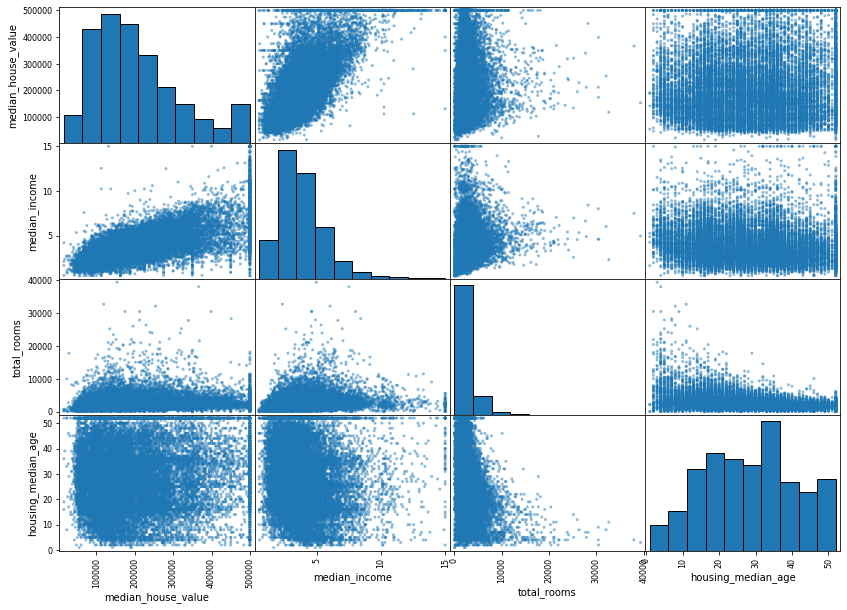

In [9]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df_data[attributes], figsize=(14, 10), hist_kwds={'edgecolor':'black'})
plt.show()

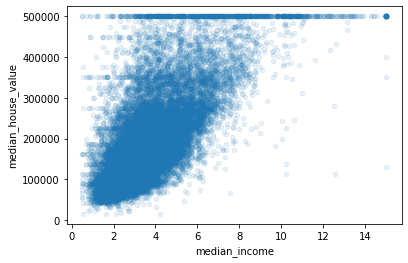

In [10]:
df_data.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.1)
plt.show()

In [11]:
df_data['rooms_per_household'] = df_data['total_rooms'] / df_data['households']
df_data['bedrooms_per_room'] = df_data['total_bedrooms'] / df_data['total_rooms']
df_data['population_per_household']=df_data['population'] / df_data['households']

In [12]:
df_corr = df_data.corr()
median_house_corr = df_corr['median_house_value'].sort_values(ascending=False)
median_house_corr

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [13]:
median_house_corr[['total_rooms', 'rooms_per_household']]

total_rooms            0.134153
rooms_per_household    0.151948
Name: median_house_value, dtype: float64

In [14]:
median_house_corr[['total_bedrooms', 'bedrooms_per_room']]

total_bedrooms       0.049686
bedrooms_per_room   -0.255880
Name: median_house_value, dtype: float64

In [15]:
median_house_corr[['population', 'population_per_household']]

population                 -0.024650
population_per_household   -0.023737
Name: median_house_value, dtype: float64